<a href="https://colab.research.google.com/github/iisoml/analyze-the-pumpkin-data/blob/main/analyze_the_pumpkin_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data = pd.read_csv('../content/Data/US-pumpkins.csv')
data.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [2]:
data.shape

(1757, 26)

In [3]:
data.isnull().sum()

,0
City Name,0
Type,1712
Package,0
Variety,5
Sub Variety,1461
Grade,1757
Date,0
Low Price,0
High Price,0
Mostly Low,103


In [4]:
columns_to_select = ['Package','Low Price','High Price','Date']
data = data.loc[:, columns_to_select]

In [5]:
data

,Package,Low Price,High Price,Date
0,24 inch bins,270.00,280.00,4/29/17
1,24 inch bins,270.00,280.00,5/6/17
2,24 inch bins,160.00,160.00,9/24/16
3,24 inch bins,160.00,160.00,9/24/16
4,24 inch bins,90.00,100.00,11/5/16
...,...,...,...,...
1752,22 lb cartons,14.75,14.75,9/30/16
1753,36 inch bins,275.00,275.00,9/26/16
1754,36 inch bins,275.00,275.00,9/27/16
1755,36 inch bins,275.00,275.00,9/28/16


In [6]:
price = (data['Low Price']+data['High Price'])/2
month = pd.DatetimeIndex(data['Date']).month

In [7]:
new_data = pd.DataFrame({'Month': month ,'Package': data['Package'], 'High Price': data['High Price'], 'Low Price': data['Low Price'], 'Price': price})

In [8]:
new_data

,Month,Package,High Price,Low Price,Price
0,4,24 inch bins,280.00,270.00,275.00
1,5,24 inch bins,280.00,270.00,275.00
2,9,24 inch bins,160.00,160.00,160.00
3,9,24 inch bins,160.00,160.00,160.00
4,11,24 inch bins,100.00,90.00,95.00
...,...,...,...,...,...
1752,9,22 lb cartons,14.75,14.75,14.75
1753,9,36 inch bins,275.00,275.00,275.00
1754,9,36 inch bins,275.00,275.00,275.00
1755,9,36 inch bins,275.00,275.00,275.00


In [9]:
data = data[data['Package'].str.contains('bushel', case=True, regex=True)]

In [10]:
data

,Package,Low Price,High Price,Date
70,1 1/9 bushel cartons,15.00,15.0,9/24/16
71,1 1/9 bushel cartons,18.00,18.0,9/24/16
72,1 1/9 bushel cartons,18.00,18.0,10/1/16
73,1 1/9 bushel cartons,17.00,17.0,10/1/16
74,1 1/9 bushel cartons,15.00,15.0,10/8/16
...,...,...,...,...
1738,1/2 bushel cartons,15.00,15.0,9/30/16
1739,1/2 bushel cartons,13.75,15.0,9/30/16
1740,1/2 bushel cartons,10.75,15.0,9/30/16
1741,1/2 bushel cartons,12.00,12.0,9/30/16


In [11]:
new_data.loc[new_data['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)

new_data.loc[new_data['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

In [12]:
new_data

,Month,Package,High Price,Low Price,Price
0,4,24 inch bins,280.00,270.00,275.00
1,5,24 inch bins,280.00,270.00,275.00
2,9,24 inch bins,160.00,160.00,160.00
3,9,24 inch bins,160.00,160.00,160.00
4,11,24 inch bins,100.00,90.00,95.00
...,...,...,...,...,...
1752,9,22 lb cartons,14.75,14.75,14.75
1753,9,36 inch bins,275.00,275.00,275.00
1754,9,36 inch bins,275.00,275.00,275.00
1755,9,36 inch bins,275.00,275.00,275.00


In [13]:
import matplotlib.pyplot as plt

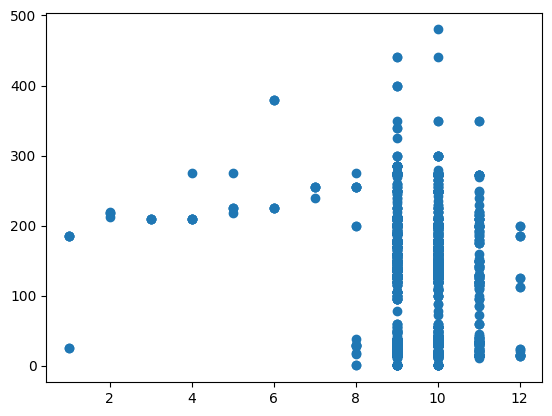

In [14]:
price = new_data.Price
month = new_data.Month
plt.scatter(month, price)
plt.show()

Text(0, 0.5, 'Pumpkin Price')

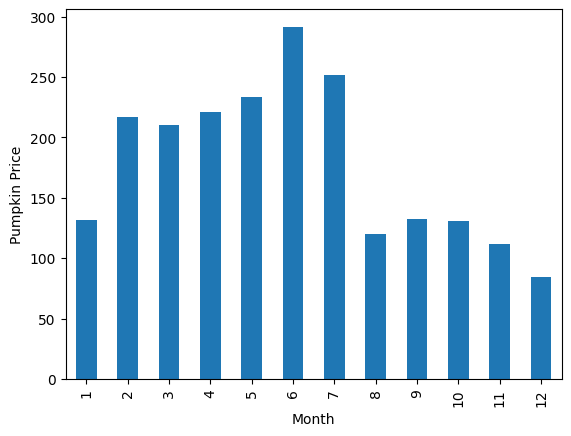

In [15]:
new_data.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")